In [5]:
%load_ext autoreload
%autoreload 2

In [39]:
import time
from collections import deque
import numpy as np
import scipy as sp
import scipy.sparse
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from generate_matrices import band_mx, band_mx_with_given_cond

In [5]:
band_mx(5, 3, half_band_size=3)

[-24.98373105 -25.75552193 -22.96455279 -26.38817053 -24.62220085
 -26.37779635 -24.94882001]
[[-24.98373105 -24.98373105 -24.98373105]
 [-25.75552193 -25.75552193 -25.75552193]
 [-22.96455279 -22.96455279 -22.96455279]
 [-26.38817053 -26.38817053 -26.38817053]
 [-24.62220085 -24.62220085 -24.62220085]
 [-26.37779635 -26.37779635 -26.37779635]
 [-24.94882001 -24.94882001 -24.94882001]]
[-3 -2 -1  0  1  2  3]


<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements (7 diagonals) in DIAgonal format>

In [6]:
band_mx(5, 3, half_band_size=3, return_sparse=False)

[-25.07107905 -26.09829239 -24.71923002 -25.01614101 -24.92119495
 -24.46415925 -24.18835058]
[[-25.07107905 -25.07107905 -25.07107905]
 [-26.09829239 -26.09829239 -26.09829239]
 [-24.71923002 -24.71923002 -24.71923002]
 [-25.01614101 -25.01614101 -25.01614101]
 [-24.92119495 -24.92119495 -24.92119495]
 [-24.46415925 -24.46415925 -24.46415925]
 [-24.18835058 -24.18835058 -24.18835058]]
[-3 -2 -1  0  1  2  3]


array([[-25.01614101, -24.92119495, -24.46415925],
       [-24.71923002, -25.01614101, -24.92119495],
       [-26.09829239, -24.71923002, -25.01614101],
       [-25.07107905, -26.09829239, -24.71923002],
       [  0.        , -25.07107905, -26.09829239]])

In [7]:
print(band_mx(10, 10, half_band_size=3, return_sparse=False))

[-24.20699376 -25.4440164  -25.54174161 -24.33191448 -25.11553705
 -26.07239115 -23.50164298]
[[-24.20699376 -24.20699376 -24.20699376 -24.20699376 -24.20699376
  -24.20699376 -24.20699376 -24.20699376 -24.20699376 -24.20699376]
 [-25.4440164  -25.4440164  -25.4440164  -25.4440164  -25.4440164
  -25.4440164  -25.4440164  -25.4440164  -25.4440164  -25.4440164 ]
 [-25.54174161 -25.54174161 -25.54174161 -25.54174161 -25.54174161
  -25.54174161 -25.54174161 -25.54174161 -25.54174161 -25.54174161]
 [-24.33191448 -24.33191448 -24.33191448 -24.33191448 -24.33191448
  -24.33191448 -24.33191448 -24.33191448 -24.33191448 -24.33191448]
 [-25.11553705 -25.11553705 -25.11553705 -25.11553705 -25.11553705
  -25.11553705 -25.11553705 -25.11553705 -25.11553705 -25.11553705]
 [-26.07239115 -26.07239115 -26.07239115 -26.07239115 -26.07239115
  -26.07239115 -26.07239115 -26.07239115 -26.07239115 -26.07239115]
 [-23.50164298 -23.50164298 -23.50164298 -23.50164298 -23.50164298
  -23.50164298 -23.50164298 -2

In [14]:
np.random.seed(1)
mx = band_mx(10, 10, half_band_size=1, return_sparse=False)
print(mx)

[ 56.21726818 -55.58782068 -51.40858761]
[[ 56.21726818  56.21726818  56.21726818  56.21726818  56.21726818
   56.21726818  56.21726818  56.21726818  56.21726818  56.21726818]
 [-55.58782068 -55.58782068 -55.58782068 -55.58782068 -55.58782068
  -55.58782068 -55.58782068 -55.58782068 -55.58782068 -55.58782068]
 [-51.40858761 -51.40858761 -51.40858761 -51.40858761 -51.40858761
  -51.40858761 -51.40858761 -51.40858761 -51.40858761 -51.40858761]]
[-1  0  1]
[[-55.58782068 -51.40858761   0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [ 56.21726818 -55.58782068 -51.40858761   0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.          56.21726818 -55.58782068 -51.40858761   0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.          56.21726818 -55.58782068 -51.40858761   0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.  

In [21]:
u, singular_vals, v = np.linalg.svd(mx)
singular_vals

array([ 117.34813882,  117.27850889,  106.45931448,  106.17026295,
         90.26282249,   89.56135248,   72.39620924,   71.00508212,
         60.00185082,   54.28409154])

In [27]:
np.linalg.cond(mx)

2.1617408616990343

In [9]:
print(band_mx_with_given_cond(10, 10, 5, cond=3000))
print('cond:', np.linalg.cond(band_mx_with_given_cond(10, 10, 5, cond=3000)))

[[-95.01948325 -75.96850342 -49.29903613 -10.47733122   2.06749546
  -30.91546709   0.           0.           0.           0.        ]
 [ 28.40368848 -95.01948325 -75.96850342 -49.29903613 -10.47733122
    2.06749546 -30.91546709   0.           0.           0.        ]
 [ 77.85488687  28.40368848 -95.01948325 -75.96850342 -49.29903613
  -10.47733122   2.06749546 -30.91546709   0.           0.        ]
 [-52.14600744  77.85488687  28.40368848 -95.01948325 -75.96850342
  -49.29903613 -10.47733122   2.06749546 -30.91546709   0.        ]
 [-74.85570342 -52.14600744  77.85488687  28.40368848 -95.01948325
  -75.96850342 -49.29903613 -10.47733122   2.06749546 -30.91546709]
 [ 17.99553203 -74.85570342 -52.14600744  77.85488687  28.40368848
  -95.01948325 -75.96850342 -49.29903613 -10.47733122   2.06749546]
 [  0.          17.99553203 -74.85570342 -52.14600744  77.85488687
   28.40368848 -95.01948325 -75.96850342 -49.29903613 -10.47733122]
 [  0.           0.          17.99553203 -74.85570342 -

In [69]:
def Kaczmarz(A,f,x_0,N_max,eps):
    x = np.copy(x_0)
    m = A.shape[0]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2
    #Kaczmarz method itself
    startTime = time.time()
    for i in range(N_max):
        k = i % m
        x = x + ((f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

In [23]:
def Kaczmarz_band(A,f,x_0,N_max,eps):
    x = np.copy(x_0)
    m = A.shape[0]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2
    #Kaczmarz method itself
    startTime = time.time()
    for i in range(N_max):
        if i % 2 == 0:
            k = (i // 2) % m
        else:
            k = m - 1 - (i // 2) % m
        x = x + ((f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

In [24]:
def SimpleRandomKaczmarz(A,f,x_0,N_max,eps):
    x = np.copy(x_0)
    m = A.shape[0]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    cum_norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2   
    np.random.seed(666)
    #just uniform distribution on the set of equations
    startTime = time.time()
    for i in range(N_max):
        k = np.random.randint(m)
        x = x + ((f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

In [84]:
def RandomKaczmarz(A,f,x_0,N_max,eps):
    x = np.copy(x_0)
    m = A.shape[0]
    res = np.array([np.linalg.norm(A @ x - f)/np.linalg.norm(f)])
    norms = np.zeros(m)
    cum_norms = np.zeros(m)
    #calculate row norms in advance
    for i in range(m):
        norms[i] = np.linalg.norm(A[i,:])**2   
    cum_norms = np.cumsum(norms)
    cum_norms /= cum_norms[len(cum_norms)-1]
    np.random.seed(666)
    startTime = time.time()
    #Follow Strohmer, Vershinin
    for i in range(N_max):
        r = np.random.rand()
        k = np.searchsorted(cum_norms,r)
        x = x + ((f[k] - np.dot(A[k,:],x))/norms[k])*A[k,:]
        #update residual
        new_res = np.linalg.norm(A @ x - f)/np.linalg.norm(f)
        res = np.append(res,[new_res])
        if new_res < eps:
            break
    endTime = time.time()
    return x,res,endTime-startTime

In [74]:
def KaczLyust(A,b,eps,maxIter,x0):
    '''Performs the main calculation procedure over the params.
    calculate(dict params, int testNo=None) -> dict answer
    '''
    # You can print a debug info onto the main screen
    
    answer = {}
    answer['info'] = {'calcTime': None, 'iterNum': None, 'res': None}
    startTime = time.time()
    iterNum = 1
    
    n = len(A)
    A = A.astype(float); b = b.astype(float)    # required for division
    # Norm each equation
    normCoef = np.transpose(np.sqrt(np.sum(A ** 2, 1)))
    A /= normCoef[:,None]
    b /= normCoef
    x = np.copy(x_0)
    # using 2nd norm below (change to suit your needs)
    disparity = lambda x: np.linalg.norm(b - np.dot(A, np.transpose(x)))/np.linalg.norm(b)
    cosVectAngle = lambda a, b: np.inner(a, b) / np.linalg.norm(a) / np.linalg.norm(b)
    HPlane_Pnts = deque()
    lastVr = None
    q_last = None
    init_lastVr = False
    answer['info']['res'] = [disparity(x)]
    while iterNum < maxIter and disparity(x) >= eps:
        for i in range(n):
            k = i
            t = A[k] @ x - b[k]
            x -= A[k] * t
            new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
            answer['info']['res'].append(new_res)
            if i == n - 1:
                HPlane_Pnts.append(np.copy(x))
        if len(HPlane_Pnts) > 3:
            HPlane_Pnts.popleft()
            #pprint(HPlane_Pnts)
            if not init_lastVr:
                prevVr = HPlane_Pnts[-2] - HPlane_Pnts[-3]
            else:
                prevVr = lastVr
            lastVr = HPlane_Pnts[-1] - HPlane_Pnts[-2]
            init_lastVr = True
            #print 'cos(angle): ', cosVectAngle(prevVr, lastVr)
            #if np.isclose(cosVectAngle(prevVr, lastVr), 1):
            
            q_prev = q_last
            q_last = np.linalg.norm(lastVr) / \
                    np.linalg.norm(prevVr)
            #print 'q_prev: {}, q_last: {} '.format(q_prev, q_last)
            if not (q_prev is None) and \
                q_last != 1 and \
                np.isclose(q_prev, q_last) and \
                np.isclose(cosVectAngle(prevVr, lastVr), 1):
                
                # Lyusternik acceleration
                print('accelerating; iterNum: %d, q_last: %f' % (iterNum, q_last))
                x = HPlane_Pnts[-1] + (HPlane_Pnts[-1] - HPlane_Pnts[-2]) / (1.0 - q_last)
                print('disparity of x: ', disparity(x))
                HPlane_Pnts.clear()
                
            #time.sleep(2)
        iterNum += n
    #add last residual
    new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
    answer['info']['res'].append(new_res)
    #end
    endTime = time.time()
    answer['x'] = x
    answer['info']['calcTime'] = endTime - startTime
    answer['info']['iterNum'] = iterNum
    answer['info']['disparity'] = disparity(x)
    #if A.shape[0] == A.shape[1]:
    #    answer['info']['conditionNum'] = np.linalg.norm(A) * np.linalg.norm(LA.inv(A))
    #else:
    #    answer['info']['conditionNum'] = 0
    return answer

In [47]:
def KaczLyust_band(A,b,eps,maxIter,x0):
    '''Performs the main calculation procedure over the params.
    calculate(dict params, int testNo=None) -> dict answer
    '''
    # You can print a debug info onto the main screen
    
    answer = {}
    answer['info'] = {'calcTime': None, 'iterNum': None, 'res': None}
    startTime = time.time()
    iterNum = 1
    
    n = len(A)
    A = A.astype(float); b = b.astype(float)    # required for division
    # Norm each equation
    normCoef = np.transpose(np.sqrt(np.sum(A ** 2, 1)))
    A /= normCoef[:,None]
    b /= normCoef
    x = np.copy(x_0)
    # using 2nd norm below (change to suit your needs)
    disparity = lambda x: np.linalg.norm(b - np.dot(A, np.transpose(x)))/np.linalg.norm(b)
    cosVectAngle = lambda a, b: np.inner(a, b) / np.linalg.norm(a) / np.linalg.norm(b)
    HPlane_Pnts = deque()
    lastVr = None
    q_last = None
    init_lastVr = False
    answer['info']['res'] = [disparity(x)]
    while iterNum < maxIter and disparity(x) >= eps:
        for i in range(n):
            if i % 2 == 0:
                k = (i // 2) % n
            else:
                k = n - 1 - (i // 2) % n
            
            t = A[k] @ x - b[k]
            x -= A[k] * t
            new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
            answer['info']['res'].append(new_res)
            if i == n - 1:
                HPlane_Pnts.append(np.copy(x))
        if len(HPlane_Pnts) > 3:
            HPlane_Pnts.popleft()
            #pprint(HPlane_Pnts)
            if not init_lastVr:
                prevVr = HPlane_Pnts[-2] - HPlane_Pnts[-3]
            else:
                prevVr = lastVr
            lastVr = HPlane_Pnts[-1] - HPlane_Pnts[-2]
            init_lastVr = True
            #print 'cos(angle): ', cosVectAngle(prevVr, lastVr)
            #if np.isclose(cosVectAngle(prevVr, lastVr), 1):
            
            q_prev = q_last
            q_last = np.linalg.norm(lastVr) / \
                    np.linalg.norm(prevVr)
            #print 'q_prev: {}, q_last: {} '.format(q_prev, q_last)
            if not (q_prev is None) and \
                q_last != 1 and \
                np.isclose(q_prev, q_last) and \
                np.isclose(cosVectAngle(prevVr, lastVr), 1):
                
                # Lyusternik acceleration
                print('accelerating; iterNum: %d, q_last: %f' % (iterNum, q_last))
                x = HPlane_Pnts[-1] + (HPlane_Pnts[-1] - HPlane_Pnts[-2]) / (1.0 - q_last)
                print('disparity of x: ', disparity(x))
                HPlane_Pnts.clear()
                
            #time.sleep(2)
        iterNum += n
    #add last residual
    new_res = np.linalg.norm(A @ x - b)/np.linalg.norm(b)
    answer['info']['res'].append(new_res)
    #end
    endTime = time.time()
    answer['x'] = x
    answer['info']['calcTime'] = endTime - startTime
    answer['info']['iterNum'] = iterNum
    answer['info']['disparity'] = disparity(x)
    #if A.shape[0] == A.shape[1]:
    #    answer['info']['conditionNum'] = np.linalg.norm(A) * np.linalg.norm(LA.inv(A))
    #else:
    #    answer['info']['conditionNum'] = 0
    return answer

Testing

In [90]:
n = 100
b = 10
init_ampl = 300
cond = 30000
mx = band_mx_with_given_cond(n, n, b, init_ampl, cond, verbose=1)
mx

2500000.0 4.62567048934e+36
1250000.0 1.77915023833e+35
625000.0 5.36736303932e+32
312500.0 1.4768802562e+31
156250.0 3.78889950808e+29
78125.0 2.90532320673e+27
39062.5 4.1197303263e+25
19531.25 2.30486980704e+23
9765.625 1.98686587062e+22
4882.8125 7.53127673584e+20
2441.40625 4.98380699221e+17
1220.703125 2.96206310303e+16
610.3515625 1.96209668254e+16
305.17578125 6.92431785338e+14
152.587890625 1.36276894725e+13
76.2939453125 776205053254.0
38.14697265625 7531844742.45
19.073486328125 57568735.2478
9.5367431640625 942844.664636
14.30511474609375 11812.2834252
11.920928955078125 1514320.35911
10.728836059570312 50454.8085404
11.324882507324219 20153.3188743
11.026859283447266 30999.1244524
11.175870895385742 24814.1476943
11.25037670135498 27686.0627121
11.2876296043396 29283.0477436
11.26900315284729 30125.6022328
11.278316378593445 29700.530952
11.282972991466522 29912.1086123
11.280644685029984 30018.6147311
11.281808838248253 29965.3016489
11.282390914857388 29991.9431656
11.28

array([[-208.95364898, -138.19863288,  228.32824832, ...,    0.        ,
           0.        ,    0.        ],
       [-238.81548644, -208.95364898, -138.19863288, ...,    0.        ,
           0.        ,    0.        ],
       [ 219.74287257, -238.81548644, -208.95364898, ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   0.        ,    0.        ,    0.        , ..., -208.95364898,
        -138.19863288,  228.32824832],
       [   0.        ,    0.        ,    0.        , ..., -238.81548644,
        -208.95364898, -138.19863288],
       [   0.        ,    0.        ,    0.        , ...,  219.74287257,
        -238.81548644, -208.95364898]])

In [14]:
np.linalg.cond(mx)

30000.002525738753

In [93]:
true_sol = np.random.randn(n)
b = mx @ true_sol

In [98]:
eps = 1e-5
N_max = 100000
np.random.seed(666)
x_0 = np.random.rand(n)
x_kacz,res_kacz,t_kacz = Kaczmarz(mx,b,x_0,N_max,eps)
x_kacz_band,res_kacz_band,t_kacz_band = Kaczmarz_band(mx,b,x_0,N_max,eps)
x_simple_rand,res_simple_rand,t_simple_rand = SimpleRandomKaczmarz(mx,b,x_0,N_max,eps)
x_rand,res_rand,t_rand = RandomKaczmarz(mx,b,x_0,N_max,eps)
answer = KaczLyust(mx, b, eps, N_max, x_0)
answer_band = KaczLyust_band(mx,b,eps,N_max,x_0)

accelerating; iterNum: 27801, q_last: 0.999679
disparity of x:  0.000623574497147
accelerating; iterNum: 47501, q_last: 0.999725
disparity of x:  0.00042930083386
accelerating; iterNum: 65301, q_last: 0.999736
disparity of x:  0.000378641767288
accelerating; iterNum: 85801, q_last: 0.999774
disparity of x:  0.000343465554773
accelerating; iterNum: 26501, q_last: 0.999777
disparity of x:  0.000617418160732
accelerating; iterNum: 47001, q_last: 0.999746
disparity of x:  0.000432039898311
accelerating; iterNum: 47601, q_last: 0.975742
disparity of x:  0.00038637238896
accelerating; iterNum: 58301, q_last: 0.999741
disparity of x:  0.000319145941974
accelerating; iterNum: 77901, q_last: 0.999754
disparity of x:  0.000246104397355
accelerating; iterNum: 78501, q_last: 0.975432
disparity of x:  0.000213994561694
accelerating; iterNum: 88901, q_last: 0.999748
disparity of x:  0.000191881016112


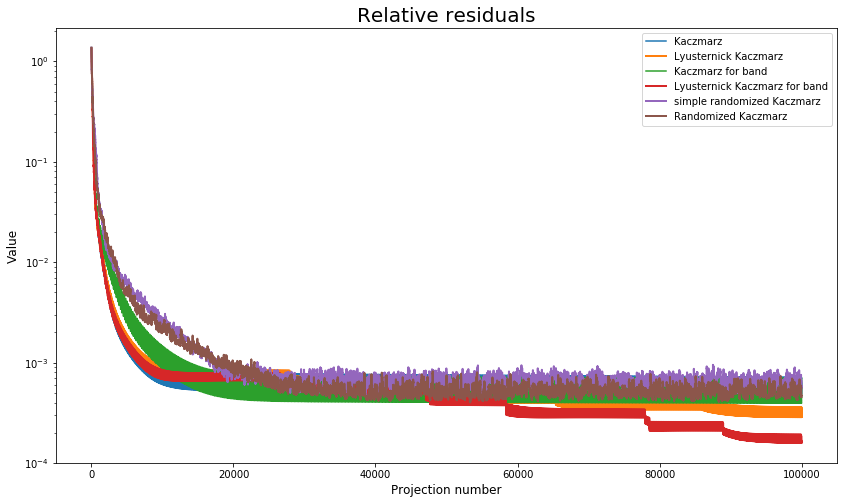

In [100]:
plt.figure(figsize=(14,8))
plt.semilogy(res_kacz, label='Kaczmarz')
plt.semilogy(answer['info']['res'], linestyle = '-', linewidth = 2.0, label='Lyusternick Kaczmarz')
plt.semilogy(res_kacz_band, label='Kaczmarz for band')
plt.semilogy(answer_band['info']['res'], linestyle = '-', linewidth = 2.0, label='Lyusternick Kaczmarz for band')
plt.plot(res_simple_rand, linestyle = '-', linewidth = 2.0, label='simple randomized Kaczmarz')
plt.plot(res_rand, linestyle = '-', linewidth = 2.0, label='Randomized Kaczmarz')
plt.title('Relative residuals', fontsize = 20)
plt.ylabel('Value', fontsize = 12)
plt.xlabel('Projection number', fontsize = 12)
plt.yscale('log')
plt.legend()
plt.show()
plt.savefig('band_mx_n_1000_cond_30000.pdf')